# Perceptron for binary classification

In [ ]:
import numpy as np

In [ ]:
class Perceptron:
  def __init__(self):
    pass

  def fit(self, X, y, epochs = 50):
    '''
    X (n by d array): coordinates of data points
    y (n by 1 array): labels of data points (+1 or -1)
    '''
    # Set vector of initial weights as well as bias to 0
    self.weights = np.zeros(shape = (X.shape[1], 1))
    self.bias = 0

    # Adjust weights and bias for number of epochs
    for t in range(epochs):
      for i in range(len(X)):
        if y[i]*(np.dot(self.weights.T, X[i, :]) + self.bias)[0] <= 0: # model made bad guess
          # print(y[i]*(np.dot(self.weights.T, X[i, :]) + self.bias))
          self.weights = self.weights + np.expand_dims(y[i]*X[i, :], axis = 0).T
          self.bias = self.bias + y[i]

    return (self.weights, self.bias)


### Second version of perceptron, using gradient descent algorithm

Steps (for given number of epochs):
* Initialize weights to be small random numbers
* Calculate $\hat y$ from $step \big ( \vec{w} \cdot \vec{X}  + b\big )$
* Calculate loss from $\frac{1}{2n} \sum_{i=1}^n \big (\hat y_i - y \big )^2$
* Calculate gradient: $\Delta w_i = \frac{1}{n} \sum_{i=1}^n \big (\hat y_i - y_i \big ) \cdot x_i$ $\quad$ and $\Delta b = \frac{1}{n} \sum_{i=1}^n \big (\hat y_i - y_i \big )$
* Update weights according to: $ w_i = w_i - \alpha \cdot \Delta w_i$ $\quad$  and $\quad$ $b = b - \alpha \cdot \Delta b$

In [ ]:
def step(x):
  '''
  Calculates step function for perceptron
  X (n, ) array
  '''
  return np.where(x > 0, 1, -1)

step(np.array([1, 0.5, -0.2, 7.8, -0.99])) # should return [1, 1, -1, 1, -1]


array([ 1,  1, -1,  1, -1])

In [ ]:
class Perceptron2:
  def __init__(self):
    pass

  def fit(self, X, y, epochs = 1500, learning_rate = 0.01):
    '''
    X (n by d array): coordinates of data points
    y (n by 1 array): labels of data points (+1 or -1)
    '''
    # Set vector of initial weights as well as bias to 0
    self.weights = np.random.normal(size = (X.shape[1],))
    self.bias = 0

    # Adjust weights and bias for number of epochs
    for epoch in range(epochs):
      # Compute dot product between weights and X and apply step function
      y_hat = step(np.dot(self.weights, X.T) + self.bias)
      # Calcuate loss (average difference between prediction and true value of y)
      loss = 1/(2.0 * len(X))*np.sum((y_hat - y)**2)
      # Calculate delta_w and delta_b
      delta_w = (1/len(X))* np.dot(y_hat - y, X)
      # print(delta_w.shape)
      delta_b = (1/len(X))*np.sum(y_hat - y)
      # Update weights and bias
      self.weights = self.weights - learning_rate * delta_w
      self.bias = self.bias - learning_rate * delta_b
      # Print value of current loss every 100 epochs
      if epoch % 100 == 0:
        print(f"Epoch {epoch}, loss = {loss}")
    return (self.weights, self.bias)

### Prepare test data using `scikit-learn` `make_blobs` function

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 3, random_state = 42)

y[y == 0] = -1
y[0:10]

array([-1,  1, -1,  1,  1, -1,  1,  1, -1, -1])

### Plot data set

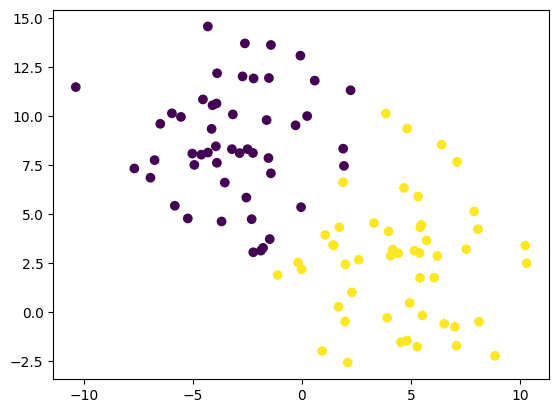

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

### Initialize and train the perceptron

In [ ]:
percie = Perceptron()

weights, bias = percie.fit(X, y)

In [ ]:
weights, bias

(array([[15.93944545],
        [-9.8139072 ]]),
 41)

### Plot the decision boundary for first version of perceptron

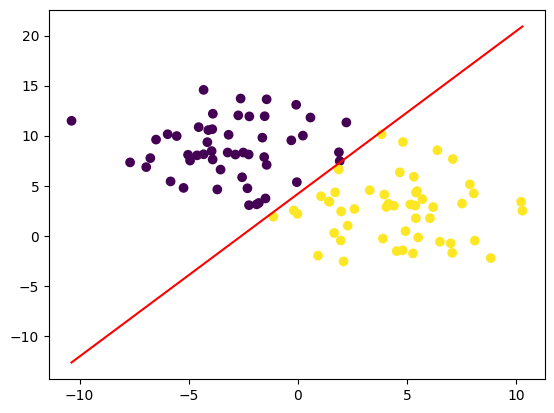

In [ ]:
x_min = X[:, 0].min()
x_max = X[:, 0].max()

x_new = np.linspace(x_min, x_max, 100)
y_new = - (weights[0]/weights[1]) * x_new - bias/weights[1]

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(x_new, y_new, color = 'red')
plt.show()

### Same calculation for second version of perceptron

In [ ]:
percie2 = Perceptron2()

weights2, bias2 = percie2.fit(X, y)

Epoch 0, loss = 1.04
Epoch 100, loss = 0.02
Epoch 200, loss = 0.0
Epoch 300, loss = 0.0
Epoch 400, loss = 0.0
Epoch 500, loss = 0.0
Epoch 600, loss = 0.0
Epoch 700, loss = 0.0
Epoch 800, loss = 0.0
Epoch 900, loss = 0.0
Epoch 1000, loss = 0.0
Epoch 1100, loss = 0.0
Epoch 1200, loss = 0.0
Epoch 1300, loss = 0.0
Epoch 1400, loss = 0.0


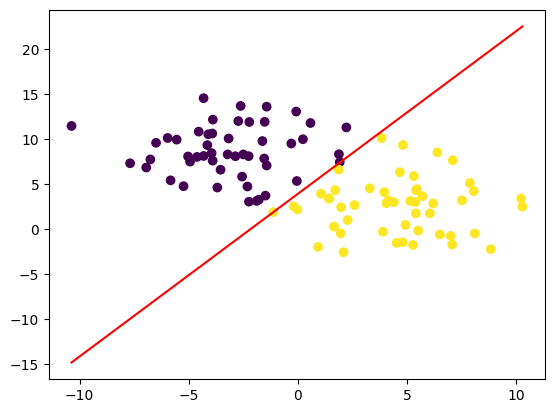

In [ ]:
y_new2 = - (weights2[0]/weights2[1]) * x_new - bias2/weights2[1]

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(x_new, y_new2, color = 'red')
plt.show()